<a href="https://colab.research.google.com/github/vidaldurazo/estadisticapython/blob/main/DemoDay_Estad%C3%ADstica_con_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Descripción del Dataset

**Descripción:**

la presente dataset recopila las condiciones climatológicas (*Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall*) de la ciudad de Seoul, Korea, y el uso de las bicicletas públicas rentadas en diferentes puntos de la ciudad

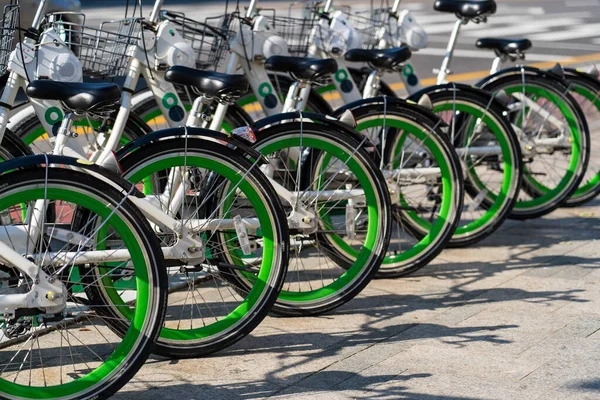

fuente: https://www.kaggle.com/datasets/saurabhshahane/seoul-bike-sharing-demand-prediction


Objetivo: identificar un modelo de predicción apropiado de la demanada




# Setup

**Bibliotecas**

primero importamos las bibliotecas necesarias para la organización de los datos y hacemos la importación del csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

RAWcsv = pd.read_csv('/content/drive/MyDrive/Clases/BEDU/Data science/3 - Python/DemoDay/SeoulBikeData-1.csv', encoding= 'unicode_escape')
RAWcsv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m-s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ-m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

**Revisión inicial**
procedemos a revisar superficialmente el df

In [ ]:
RAWcsv.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m-s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ-m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01-12-2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01-12-2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01-12-2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01-12-2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01-12-2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
RAWcsv.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m-s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ-m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [ ]:
RAWcsv.shape

(8760, 14)

se observa que la fuente no posee ningún valor nulo, el dataframe consta de 8760 observaciones, habrá que revisar los tipos de las variables para que el análisis sea adecuado

# Casting

**análsis de variables**

se realiza la revisión de cada variable para confirmar que su tipo sea el adecuado

In [ ]:
RAWcsv.dtypes

Date                          object
Rented Bike Count              int64
Hour                           int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m-s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ-m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
dtype: object

vemos que la variable "date" no es las adecuada para los tipos que se muestran en el df, por lo tanto se procede a modificarla:

In [ ]:
RAWcsv_1 = RAWcsv
RAWcsv_1['Date'] = pd.to_datetime(RAWcsv_1['Date'])

In [ ]:
RAWcsv_1.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m-s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ-m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


convertimos las variables categóricas en categorías numéricas

In [ ]:
RAWcsv_1['Functioning Day'] = RAWcsv_1['Functioning Day'].map({'Yes':1,'No':0})
RAWcsv_1['Holiday'] = RAWcsv_1['Holiday'].map({'No Holiday':0,'Holiday':1})

# Plots generales

realizamos un scatterplot para ver la distribución de horas y bicicletas rentadas

Text(0.5, 1.0, 'Mapa de calor de correlaciones de variables')

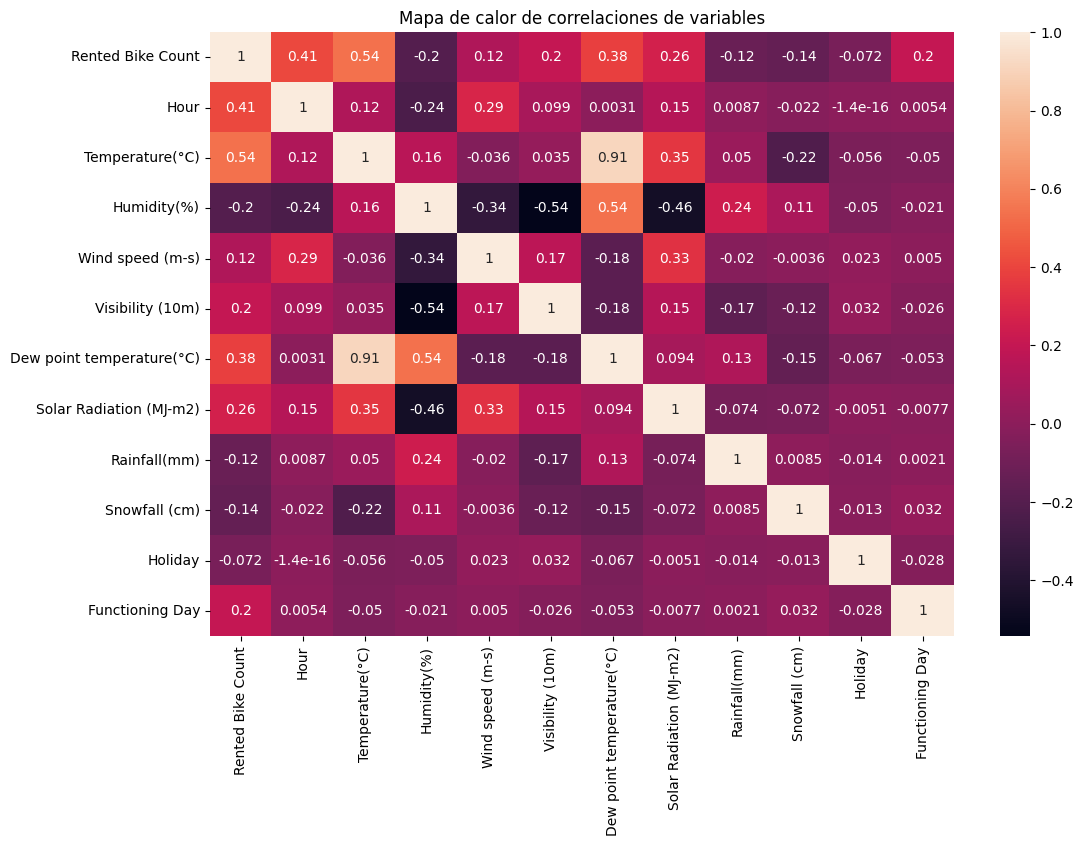

In [ ]:
plt.figure(figsize=(12,8), dpi=100)
sns.heatmap(RAWcsv_1.corr(),annot=True).set_title("Mapa de calor de correlaciones de variables")

Text(0.5, 1.0, 'Mapa de calor de correlaciones de variables')

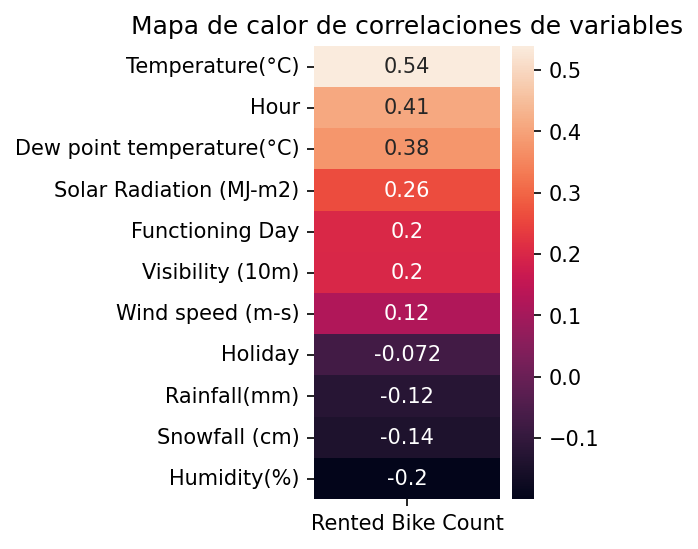

In [ ]:
plt.figure(figsize=(2,4), dpi=150)
sns.heatmap(RAWcsv_1.corr()[["Rented Bike Count"]].sort_values("Rented Bike Count", ascending=False)[1:],annot=True).set_title("Mapa de calor de correlaciones de variables")

en términos generales, vemos un nivel de correlación bajo entre las variables, sin embargo, podemos ver que el nivel de temperatura tiene cierta correlación con el consumo de servicios, ahora analizaremos el comportamiento de cada variable de manera individual

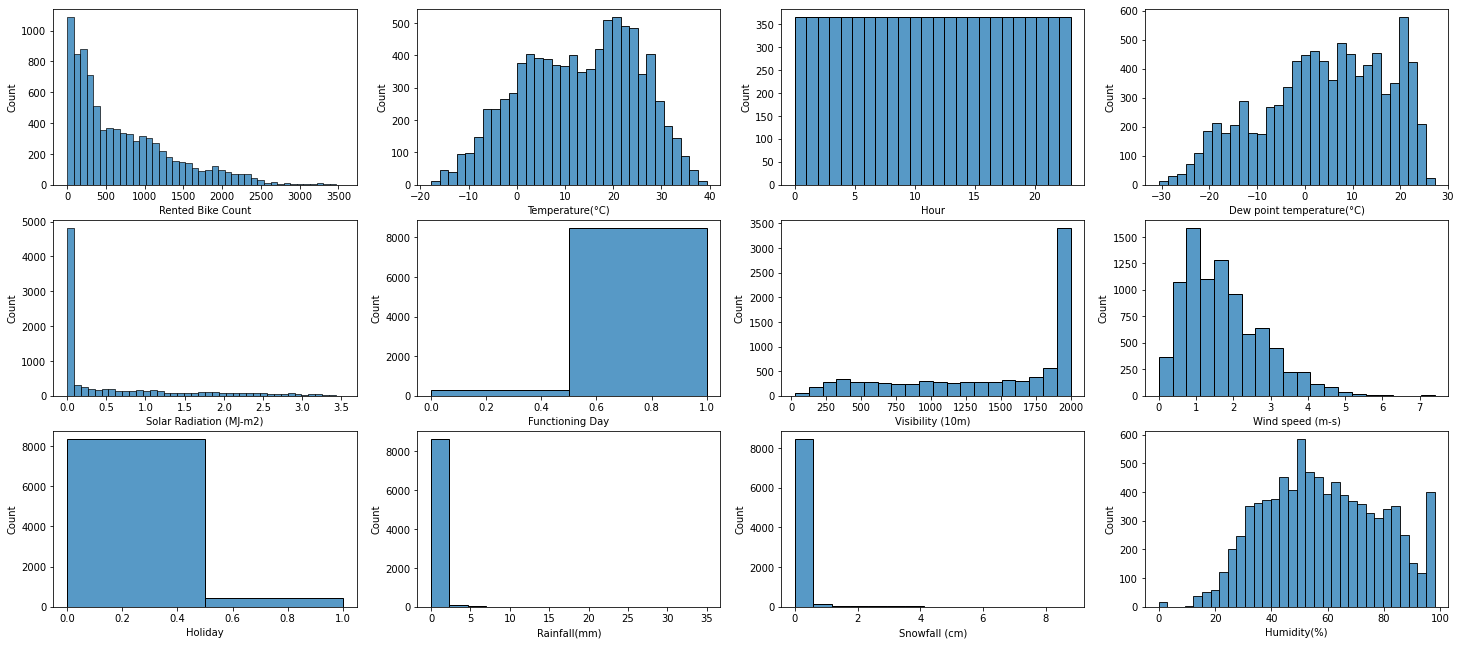

In [ ]:
fig, axs = plt.subplots(nrows=3,ncols=4,squeeze=100, figsize=(25,11))
sns.histplot(data=RAWcsv_1["Rented Bike Count"],ax=axs[0,0])
sns.histplot(data=RAWcsv_1["Temperature(°C)"],ax=axs[0,1])
sns.histplot(data=RAWcsv_1["Hour"], bins=24, ax=axs[0,2])
sns.histplot(data=RAWcsv_1["Dew point temperature(°C)"], ax=axs[0,3]) 
sns.histplot(data=RAWcsv_1["Solar Radiation (MJ-m2)"], ax=axs[1,0])
sns.histplot(data=RAWcsv_1["Functioning Day"],bins=2, ax=axs[1,1])
sns.histplot(data=RAWcsv_1["Visibility (10m)"], ax=axs[1,2])
sns.histplot(data=RAWcsv_1["Wind speed (m-s)"], bins=20, ax=axs[1,3])
sns.histplot(data=RAWcsv_1["Holiday"], bins=2, ax=axs[2,0])
sns.histplot(data=RAWcsv_1["Rainfall(mm)"], ax=axs[2,1])
sns.histplot(data=RAWcsv_1["Snowfall (cm)"], ax=axs[2,2])
sns.histplot(data=RAWcsv_1["Humidity(%)"], ax=axs[2,3])


las variables: Solar radiation, Rainfall y Snowfall, tienen poca frecuencia cuando son mayores a cero, por lo que se clasifica en una variable binaria: 0 cuando no hay presencia de radiación solar/lluvia/nieve y 1 cuando existe presencia de radiación solar/lluvia/nieve; por otro lado, la variable "visibility" presenta un comportamiento parecido, los valores bajos son muy poco frecuentes, por lo que también haremos esta variable binaria a partir del valor 2000 quees el valor donde existe plena visibilidad, por lo que quedaría: 0 cuando hay poca o nula visibilidad y 1 cuando hay completa visibilidad

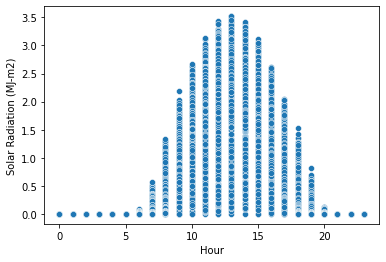

In [ ]:
sns.scatterplot(y=RAWcsv_1["Solar Radiation (MJ-m2)"], x=RAWcsv_1["Hour"])

In [ ]:
RAWcsv_2 = RAWcsv_1
RAWcsv_2['Visibility']=RAWcsv_1['Visibility (10m)'].apply(lambda x: 1 if x >= 2000 else 0)
RAWcsv_2['Rainfall']=RAWcsv_1['Rainfall(mm)'].apply(lambda x:1 if x > 0 else 0)
RAWcsv_2['Snowfall']=RAWcsv_1['Snowfall (cm)'].apply(lambda x:1 if x > 0 else 0)
RAWcsv_2['SolarRadiation']=RAWcsv_1['Solar Radiation (MJ-m2)'].apply(lambda x:1 if x > 0 else 0)
RAWcsv_2.drop(["Visibility (10m)",'Rainfall(mm)','Snowfall (cm)','Snowfall (cm)','Solar Radiation (MJ-m2)'],axis=1,inplace=True)
RAWcsv_2.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m-s),Dew point temperature(°C),Seasons,Holiday,Functioning Day,Visibility,Rainfall,Snowfall,SolarRadiation
0,2017-01-12,254,0,-5.2,37,2.2,-17.6,Winter,0,1,1,0,0,0
1,2017-01-12,204,1,-5.5,38,0.8,-17.6,Winter,0,1,1,0,0,0
2,2017-01-12,173,2,-6.0,39,1.0,-17.7,Winter,0,1,1,0,0,0
3,2017-01-12,107,3,-6.2,40,0.9,-17.6,Winter,0,1,1,0,0,0
4,2017-01-12,78,4,-6.0,36,2.3,-18.6,Winter,0,1,1,0,0,0


In [ ]:
RAWcsv_2.groupby("Functioning Day")["Rented Bike Count"].sum()

Functioning Day
0          0
1    6172314
Name: Rented Bike Count, dtype: int64

anteriormente podemos corroborar de que no existan bicicletas rentadas en días no laborados, por lo tanto eliminaremos los datos donde Functioning Day = 0

In [ ]:
RAWcsv_2=RAWcsv_2[RAWcsv_2['Functioning Day']!=0]

In [ ]:
RAWcsv_2['Functioning Day'].unique()

array([1])

In [ ]:
RAWcsv_2.drop(['Functioning Day'],axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
def barplots(x,y,hue):
    plt.figure(figsize=(10,5))
    sns.barplot(x=x,y=y,hue=hue,data=RAWcsv_2,errwidth=0);

se crea una función que permita crear varias barplots rápidamente

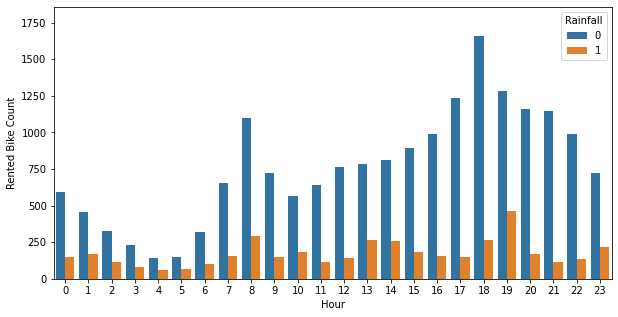

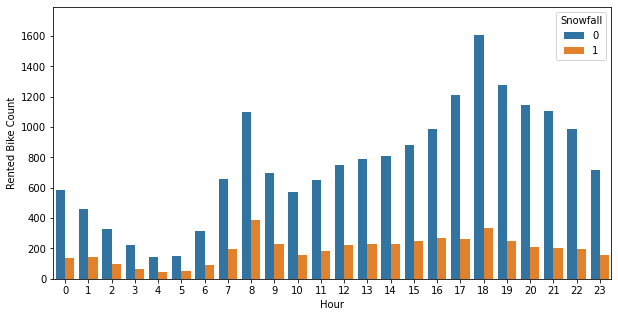

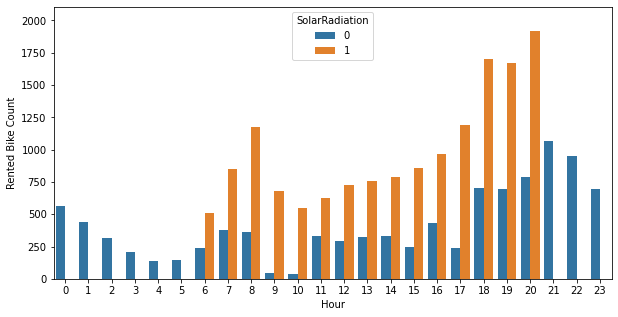

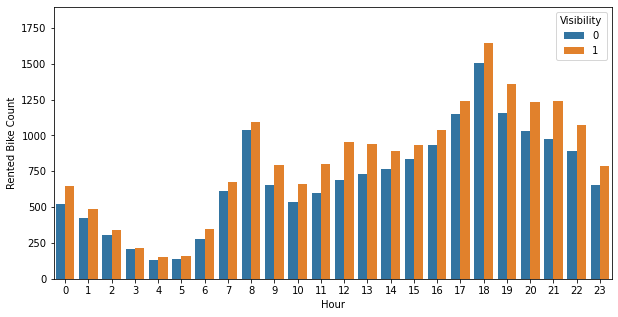

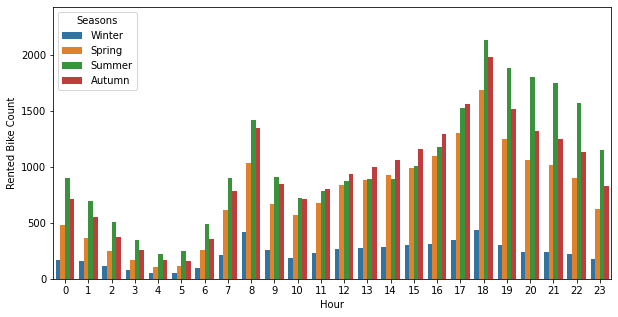

In [ ]:
hue=['Rainfall','Snowfall','SolarRadiation','Visibility','Seasons']
for i in hue:
    barplots('Hour','Rented Bike Count',i)
    plt.show()

se puede observar ciertas diferencias al comparar la demanda del servicio con respecto a la presencia o ausencia de ciertas condiciones climáticas: lluvia, nieve, radiación; también podemos ver como la demanda cambia drásticamente en invierno.

#Ajustes de dataframe para regresiones

a continuación, separaremos la variable Date en Día/Mes/Año

In [ ]:
RAWcsv_2['Día']=RAWcsv_2['Date'].dt.day
RAWcsv_2['Mes']=RAWcsv_2['Date'].dt.month
RAWcsv_2['Año']=RAWcsv_2['Date'].dt.year
RAWcsv_2.drop(['Date'],axis=1,inplace=True)
RAWcsv_2.tail()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m-s),Dew point temperature(°C),Seasons,Holiday,Visibility,Rainfall,Snowfall,SolarRadiation,Día,Mes,Año
8755,1003,19,4.2,34,2.6,-10.3,Autumn,0,0,0,0,0,30,11,2018
8756,764,20,3.4,37,2.3,-9.9,Autumn,0,1,0,0,0,30,11,2018
8757,694,21,2.6,39,0.3,-9.9,Autumn,0,0,0,0,0,30,11,2018
8758,712,22,2.1,41,1.0,-9.8,Autumn,0,0,0,0,0,30,11,2018
8759,584,23,1.9,43,1.3,-9.3,Autumn,0,0,0,0,0,30,11,2018


Para normalizar la variable "Seasons", divideremos a ésta en 4 variables con respuesta dicotómica para poder realizar análisis posterior

In [ ]:
RAWcsv_2['Seasons'].unique()

array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

In [ ]:
RAWcsv_2['Verano']=RAWcsv_2['Seasons'].map({'Summer':1,'Winter':0,'Spring':0,'Autumn':0})
RAWcsv_2['Primavera']=RAWcsv_2['Seasons'].map({'Summer':0,'Winter':0,'Spring':1,'Autumn':0})
RAWcsv_2['Otoño']=RAWcsv_2['Seasons'].map({'Summer':0,'Winter':0,'Spring':0,'Autumn':1})
RAWcsv_2['Invierno']=RAWcsv_2['Seasons'].map({'Summer':0,'Winter':1,'Spring':0,'Autumn':0})
RAWcsv_2.drop(['Seasons'],axis = 1, inplace=True)
RAWcsv_2.head()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m-s),Dew point temperature(°C),Holiday,Visibility,Rainfall,Snowfall,SolarRadiation,Día,Mes,Año,Verano,Primavera,Otoño,Invierno
0,254,0,-5.2,37,2.2,-17.6,0,1,0,0,0,12,1,2017,0,0,0,1
1,204,1,-5.5,38,0.8,-17.6,0,1,0,0,0,12,1,2017,0,0,0,1
2,173,2,-6.0,39,1.0,-17.7,0,1,0,0,0,12,1,2017,0,0,0,1
3,107,3,-6.2,40,0.9,-17.6,0,1,0,0,0,12,1,2017,0,0,0,1
4,78,4,-6.0,36,2.3,-18.6,0,1,0,0,0,12,1,2017,0,0,0,1


se renombran las columnas para facilidad de lectura

In [ ]:
RAWcsv_2.rename(columns = {'Rented Bike Count':'Bicicletas rentadas', 
                           'Hour':'Hora',
                           'Temperature(°C)':'Temperatura',
                           'Humidity(%)':'Humedad',
                           'Wind speed (m-s)':'Veloc.Viento',
                           'Dew point temperature(°C)':'Punto de rocío',
                           'Holiday':'Día festivo',
                           'Visibility':'Visibilidad',
                           'Rainfall':'Lluvia',
                           'Snowfall':'Nieve',
                           'SolarRadiation':'Radiación Solar'
                           }, inplace = True)
RAWcsv_2.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Bicicletas rentadas,Hora,Temperatura,Humedad,Veloc.Viento,Punto de rocío,Día festivo,Visibilidad,Lluvia,Nieve,Radiación Solar,Día,Mes,Año,Verano,Primavera,Otoño,Invierno
0,254,0,-5.2,37,2.2,-17.6,0,1,0,0,0,12,1,2017,0,0,0,1
1,204,1,-5.5,38,0.8,-17.6,0,1,0,0,0,12,1,2017,0,0,0,1
2,173,2,-6.0,39,1.0,-17.7,0,1,0,0,0,12,1,2017,0,0,0,1
3,107,3,-6.2,40,0.9,-17.6,0,1,0,0,0,12,1,2017,0,0,0,1
4,78,4,-6.0,36,2.3,-18.6,0,1,0,0,0,12,1,2017,0,0,0,1


In [ ]:
RAWcsv_2.columns

Index(['Bicicletas rentadas', 'Hora', 'Temperatura', 'Humedad', 'Veloc.Viento',
       'Punto de rocío', 'Día festivo', 'Visibilidad', 'Lluvia', 'Nieve',
       'Radiación Solar', 'Día', 'Mes', 'Año', 'Verano', 'Primavera', 'Otoño',
       'Invierno'],
      dtype='object')

generamos la df final para el análisis

In [ ]:
df = RAWcsv_2

# Relación visual de variables

hacemos el análisis de correlaciones con todo el dataframe numérico

Text(0.5, 1.0, 'Mapa de calor de correlaciones de variables')

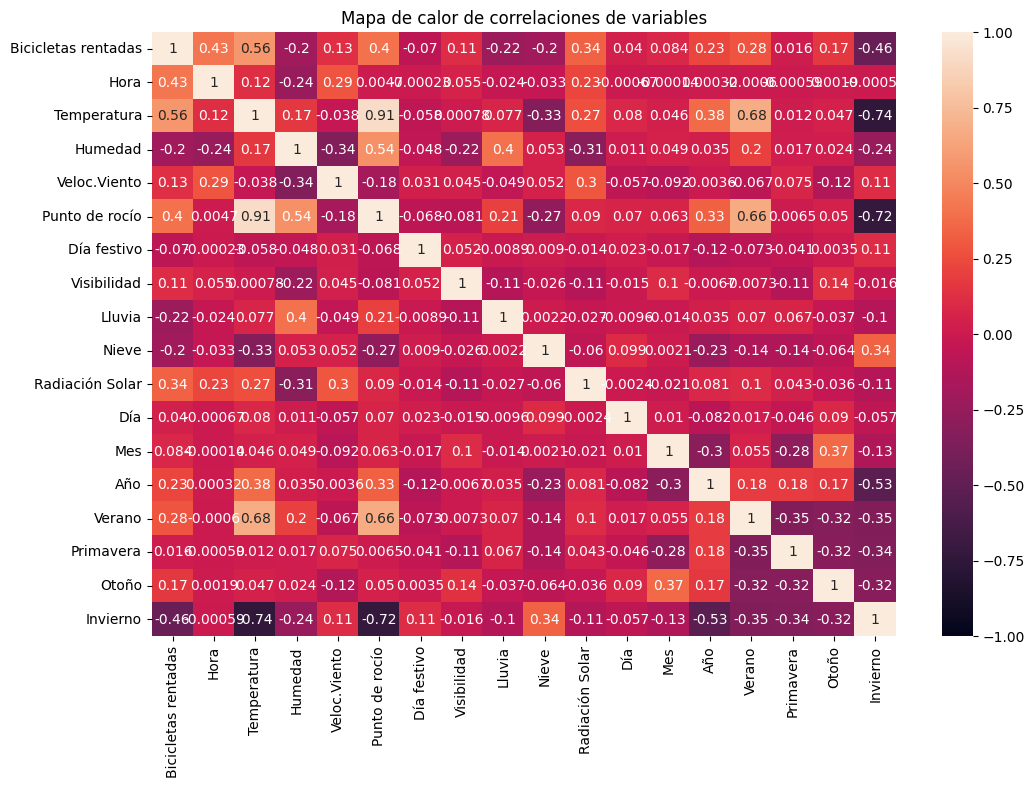

In [ ]:
plt.figure(figsize=(12,8), dpi=100)
sns.heatmap(df.corr(),annot=True, vmin=-1, vmax=1).set_title("Mapa de calor de correlaciones de variables")

Text(0.5, 1.0, 'Mapa de calor de correlaciones de variables')

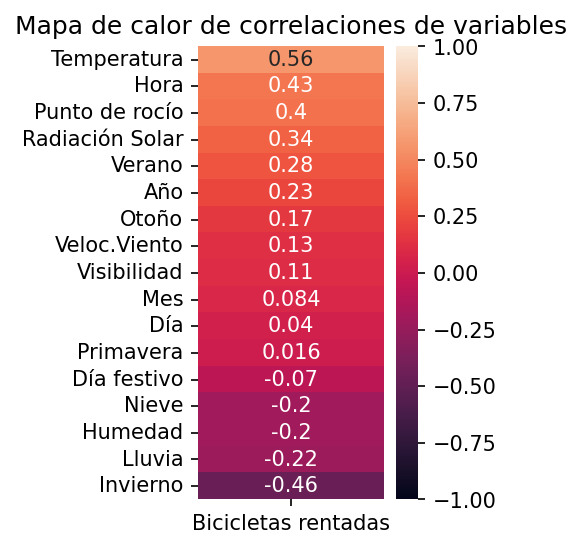

In [ ]:
plt.figure(figsize=(2,4), dpi=150)
sns.heatmap(df.corr()[["Bicicletas rentadas"]].sort_values("Bicicletas rentadas", ascending=False)[1:], annot=True, vmin=-1, vmax=1).set_title("Mapa de calor de correlaciones de variables")

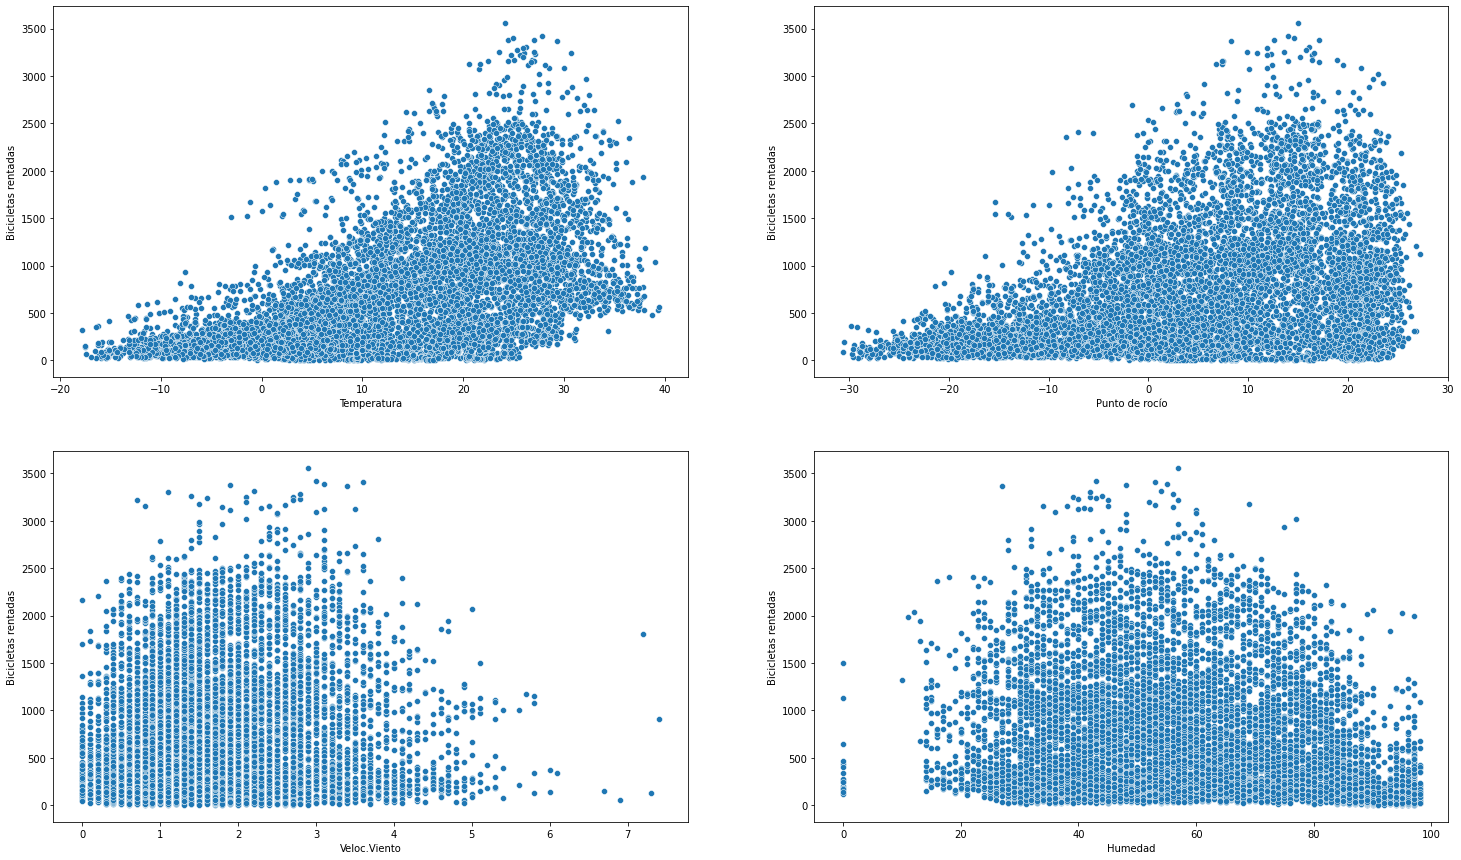

In [ ]:
fig, axs = plt.subplots(nrows=2,ncols=2,squeeze=100, figsize=(25,15))
sns.scatterplot(x=df['Temperatura'], y=df['Bicicletas rentadas'], ax=axs[0,0]);

sns.scatterplot(x=df['Punto de rocío'], y=df['Bicicletas rentadas'], ax=axs[0,1]);

sns.scatterplot(x=df['Veloc.Viento'], y=df['Bicicletas rentadas'], ax=axs[1,0]);

sns.scatterplot(x=df['Humedad'], y=df['Bicicletas rentadas'], ax=axs[1,1]);


# Métodos de regresión

se establecen las variables independientes y la dependiente

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn import metrics

from sklearn.preprocessing import StandardScaler
from lightgbm import LGBMRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [ ]:
X = df.drop('Bicicletas rentadas',axis=1)
y = df['Bicicletas rentadas']

In [ ]:
X_training, X_test, y_training, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

In [ ]:
lr = LinearRegression()
DTR = DecisionTreeRegressor()
RF = RandomForestRegressor()
LGBMR = LGBMRegressor()
lr.fit(X_training, y_training)
DTR.fit(X_training, y_training)
RF.fit(X_training, y_training)
LGBMR.fit(X_training, y_training)

LGBMRegressor()

In [ ]:
print(f'regresión lineal: {lr.score(X_test, y_test)}')
print(f'Decision Tree Regressor: {DTR.score(X_test, y_test)}')
print(f'Random Forest: {RF.score(X_test, y_test)}')
print(f'LGBMRegressor: {LGBMR.score(X_test, y_test)}')

regresión lineal: 0.5627824270158396
Decision Tree Regressor: 0.7496002229592332
Random Forest: 0.862503223418402
LGBMRegressor: 0.8742510921043998


In [ ]:
score_lr = cross_validate(lr, X, y, scoring="r2")
f"Score del modelo de regresión lineal: {score_lr['test_score'].mean():.3f} +/- {score_lr['test_score'].std():.3f}"

score_DTR = cross_validate(DTR, X, y, scoring="r2")
f"Score del modelo de regresion de árbol de decisiones: {score_DTR['test_score'].mean():.3f} +/- {score_DTR['test_score'].std():.3f}"

score_RF = cross_validate(RF, X, y, scoring="r2")
f"Score del modelo de regresion de random forest: {score_RF['test_score'].mean():.3f} +/- {score_RF['test_score'].std():.3f}"

score_LGBMR = cross_validate(LGBMR, X, y, scoring="r2")
f"Score del modelo de regresion LightGBM: {score_LGBMR['test_score'].mean():.3f} +/- {score_LGBMR['test_score'].std():.3f}"

'Score del modelo de regresion LightGBM: 0.629 +/- 0.091'

Se quitan algunas variables con bajo índice de correlación de pearson, para verificar si el R2 mejora con una lista X2

In [ ]:
X2 = df.drop(['Bicicletas rentadas', 'Nieve', 'Humedad', 'Lluvia', 'Día festivo', 'Día', 'Mes', 'Visibilidad', 'Veloc.Viento'],axis=1)


In [ ]:
X_training, X_test, y_training, y_test = train_test_split(X2, y, test_size=0.3, shuffle=True)

In [ ]:
lr = LinearRegression()
DTR = DecisionTreeRegressor()
RF = RandomForestRegressor()
LGBMR = LGBMRegressor()
lr.fit(X_training, y_training)
DTR.fit(X_training, y_training)
RF.fit(X_training, y_training)
LGBMR.fit(X_training, y_training)

LGBMRegressor()

In [ ]:
print(f'regresión lineal: {lr.score(X_test, y_test)}')
print(f'Decision Tree Regressor: {DTR.score(X_test, y_test)}')
print(f'Random Forest: {RF.score(X_test, y_test)}')
print(f'LGBMRegressor: {LGBMR.score(X_test, y_test)}')

regresión lineal: 0.5179202157345344
Decision Tree Regressor: 0.6955810377922893
Random Forest: 0.838462265935675
LGBMRegressor: 0.85455929485255


In [ ]:
score_lr = cross_validate(lr, X2, y, scoring="r2")
print(f"Score del modelo de regresión lineal: {score_lr['test_score'].mean():.3f} +/- {score_lr['test_score'].std():.3f}")

score_DTR = cross_validate(DTR, X2, y, scoring="r2")
print(f"Score del modelo de regresion de árbol de decisiones: {score_DTR['test_score'].mean():.3f} +/- {score_DTR['test_score'].std():.3f}")

score_RF = cross_validate(RF, X2, y, scoring="r2")
print(f"Score del modelo de regresion de random forest: {score_RF['test_score'].mean():.3f} +/- {score_RF['test_score'].std():.3f}")

score_LGBMR = cross_validate(LGBMR, X2, y, scoring="r2")
print(f"Score del modelo de regresion LightGBM: {score_LGBMR['test_score'].mean():.3f} +/- {score_LGBMR['test_score'].std():.3f}")

Score del modelo de regresión lineal: -0.672 +/- 1.801
Score del modelo de regresion de árbol de decisiones: 0.204 +/- 0.275
Score del modelo de regresion de random forest: 0.485 +/- 0.155
Score del modelo de regresion LightGBM: 0.532 +/- 0.136


Como vemos que el R2 no mejoró, desechamos X2 y nos quedamos con X original, utilizaremos el modelo de regresión LightGBM que fue el mejor puntuado

In [ ]:
X_training, X_test, y_training, y_test = train_test_split(X, y, test_size=0.5, shuffle=True)
LGBMR.fit(X_training, y_training)
print(f'LGBMRegressor: {LGBMR.score(X_test, y_test)}')

LGBMRegressor: 0.874091824653049


#Modelo de Predicción

In [ ]:
y_pred = LGBMR.predict(X_test)

(0.0, 3500.0)

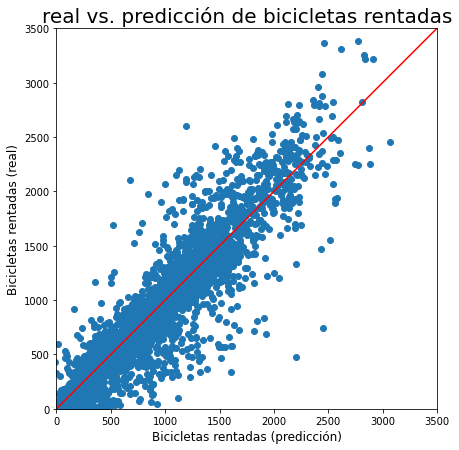

In [ ]:
x = np.linspace(0,3500,10)
y = x

plt.figure(figsize=(7,7))

plt.scatter(y_pred, y_test)
plt.plot(x, y, c='r')
plt.gca().set_aspect('equal')
plt.xlabel('Bicicletas rentadas (predicción)', size=12)
plt.ylabel('Bicicletas rentadas (real)', size=12)
plt.title('real vs. predicción de bicicletas rentadas', size=20)
plt.xlim(0,3500)
plt.ylim(0,3500)

In [ ]:
X_test.head()

,Hora,Temperatura,Humedad,Veloc.Viento,Punto de rocío,Día festivo,Visibilidad,Lluvia,Nieve,Radiación Solar,Día,Mes,Año,Verano,Primavera,Otoño,Invierno
7403,11,16.1,89,2.4,14.2,0,0,1,0,1,10,5,2018,0,0,1,0
6423,15,28.1,53,4.5,17.6,0,0,0,0,1,25,8,2018,1,0,0,0
1928,8,-1.2,51,0.8,-10.0,0,0,0,0,1,19,2,2018,0,0,0,1
3284,20,12.1,35,2.4,-2.9,0,0,0,0,0,16,4,2018,0,1,0,0
3617,17,24.0,53,3.5,13.8,0,0,0,0,1,30,4,2018,0,1,0,0


In [ ]:
def prediction(data):
  X_input = pd.DataFrame([data], columns = df.columns[1:])
  y_input = LGBMR.predict(X_input)
  return y_input[0]

In [ ]:
Hora = 9
Temperatura = 17    # °C
Humedad = 61        # % de humedad
Veloc_Viento = 8    # m-s
Punto_de_rocío = 10 # °C
Día_festivo = 0     # 1 es día festivo / 0 no es día festivo
Visibilidad = 1     # 1 hay visibilidad / 0 poca o nula visibilidad
Lluvia = 0          # 1 llueve / 0 no llueve
Nieve = 0           # 1 neva/ 0 no neva
Rad_Solar = 1       # 1 hay radiación / 0 no hay radiación
Día = 6             # 1-31
Mes = 6             # 1-12
Año = 2022          # Año
Verano = 0          # 1 es verano / 0 no es verano
Primavera = 1       # 1 es Primavera / 0 no es Primavera
Otoño = 0           # 1 es Otoño / 0 no es Otoño
Invierno = 0        # 1 es Invierno / 0 no es Invierno

data = [Hora, Temperatura, Humedad, Veloc_Viento, Punto_de_rocío, Día_festivo, Visibilidad, Lluvia, Nieve, Rad_Solar, Día, Mes, Año, Verano, Primavera, Otoño, Invierno]
round(prediction(data),0)

919.0